# Improting required libraries

In [688]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [689]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Read the File

In [690]:
BikeData = pd.read_csv("day.csv")

In [691]:
BikeData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Data Preparation and Understanding

# checking null values

In [692]:
BikeData.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [693]:
# null value percentage
round(100*BikeData.isnull().sum()/len(BikeData), 2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

- No Column has null values
- we dont have single null value or missing value.

# Check the data types of the columns

In [694]:
BikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- allthe columns has dataypte of int and float except one column i.e of type date.
- it looks like some of the columns are categorical like weathersit, seasone etc.

In [695]:
# check the shpape of the Bike data
BikeData.shape

(730, 16)

In [696]:
#There is no nullable columns or vlaues in the dataset 
BikeData.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Checking for the duplicate records

In [697]:
print(BikeData.duplicated(subset=None, keep='first').count())

730


- Bike data shape also has only 730 rows so it is observed that there is no duplicate records.

# Checking Value counts for each columns

In [698]:
for col in BikeData:
    print(col + " value counts: ")
    print(BikeData[col].value_counts() , "\n\n")

instant value counts: 
730    1
251    1
249    1
248    1
247    1
      ..
485    1
484    1
483    1
482    1
1      1
Name: instant, Length: 730, dtype: int64 


dteday value counts: 
07-07-2019    1
28-02-2018    1
05-06-2019    1
08-08-2019    1
29-06-2019    1
             ..
12-06-2018    1
07-09-2019    1
20-12-2019    1
01-06-2019    1
14-07-2019    1
Name: dteday, Length: 730, dtype: int64 


season value counts: 
3    188
2    184
1    180
4    178
Name: season, dtype: int64 


yr value counts: 
1    365
0    365
Name: yr, dtype: int64 


mnth value counts: 
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64 


holiday value counts: 
0    709
1     21
Name: holiday, dtype: int64 


weekday value counts: 
6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64 


workingday value counts: 
1    499
0    231
Name: workingday, dtype: int64 


weathersit value cou

- There is <b> no </b> unknown values or the values need to be replaced some thing.


# Remove unwanted columns

In [699]:
BikeData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [700]:
colList = ["dteday","instant", "casual", "registered"]
BikeData.drop(labels=colList, axis=1, inplace=True)
BikeNew = BikeData
BikeData.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [701]:
BikeData.shape

(730, 12)

- By understanding the datadictionary provided , we can remove the below columns.
  - Instant : is record index , since we dont need this columns data analyzing
  - dteday : date columns , since we have mnth, yr columns we dont need perticular date column
  -  "casual" and  "registered": since the cnt column is the sum of these two columns we dont need that column also
  Hence Dropped.

# Exploratory Data Analysis

In [702]:
print(BikeData["season"].describe())
print("Value counts of season", "\n\n")
print(BikeData["season"].value_counts())

count    730.000000
mean       2.498630
std        1.110184
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64
Value counts of season 


3    188
2    184
1    180
4    178
Name: season, dtype: int64


In [703]:
BikeData["yr"].describe()

count    730.000000
mean       0.500000
std        0.500343
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: yr, dtype: float64

In [704]:
# Convert to 'category' data type

BikeData['season'] = BikeData['season'].astype('category')
BikeData['weathersit'] = BikeData['weathersit'].astype('category')
BikeData['mnth'] = BikeData['mnth'].astype('category')
BikeData['weekday'] = BikeData['weekday'].astype('category')
BikeData['yr'] = BikeData['yr'].astype('int64')


In [705]:
BikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


- mapping season to its categories based on data dictionary provided

In [706]:
BikeData['season'] = BikeData['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [707]:
BikeData.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


- Year

In [708]:
print(BikeData.yr.describe())
print("\n\n", "Value counts of Bike Data: ")
print(BikeData.yr.value_counts())

count    730.000000
mean       0.500000
std        0.500343
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: yr, dtype: float64


 Value counts of Bike Data: 
1    365
0    365
Name: yr, dtype: int64


In [709]:
BikeData.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


- Weekday

In [710]:
print(BikeData.weekday.describe())
print("\n\n", "Value counts of weekday: ")
print(BikeData.weekday.value_counts())

count     730
unique      7
top         6
freq      105
Name: weekday, dtype: int64


 Value counts of weekday: 
6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64


- Weekday 0 to 6 values (categories) as per the data dictionay provided week day is  day of the week

In [711]:
BikeData['weekday'] = BikeData.weekday.map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})

In [712]:
BikeData.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,saturday,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,sunday,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,monday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,tuesday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,wednesday,1,1,9.305237,11.46350,43.6957,12.522300,1600


- Working Day

In [713]:
print(BikeData.workingday.describe())
print("\n\n", "Value counts of workingday: ")
print(BikeData.workingday.value_counts())

count    730.000000
mean       0.683562
std        0.465405
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: workingday, dtype: float64


 Value counts of workingday: 
1    499
0    231
Name: workingday, dtype: int64


- workind day as mentioned in the data dictionay is if day is neither weekend nor holiday is 1, otherwise is 0.so we are not dropping it 

- weathersit

In [714]:
print(BikeData.weathersit.describe())
print("\n\n", "Value counts of weathersit: ")
print(BikeData.weathersit.value_counts())

count     730
unique      3
top         1
freq      463
Name: weathersit, dtype: int64


 Value counts of weathersit: 
1    463
2    246
3     21
Name: weathersit, dtype: int64


- weathersit is a categorical varible as defined in the data dictionary we have four categories for that. Lets map those.
- as per the dictionary those values are the below :
   - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
   - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
   - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
   - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- we will map them like below
    - 1. clear
    - 2. mist
    - 3. light
    - 4. heavy

In [715]:
BikeData['weathersit'] = BikeData.weathersit.map({1: 'clear', 2: 'mist', 3: 'light', 4: 'heavy'})

In [716]:
BikeData.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,saturday,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,sunday,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


- <b> temp and adjusted temp</b>

In [717]:
df= BikeData[["temp", "atemp"]]
df.head()
dfTemp = df.corr()

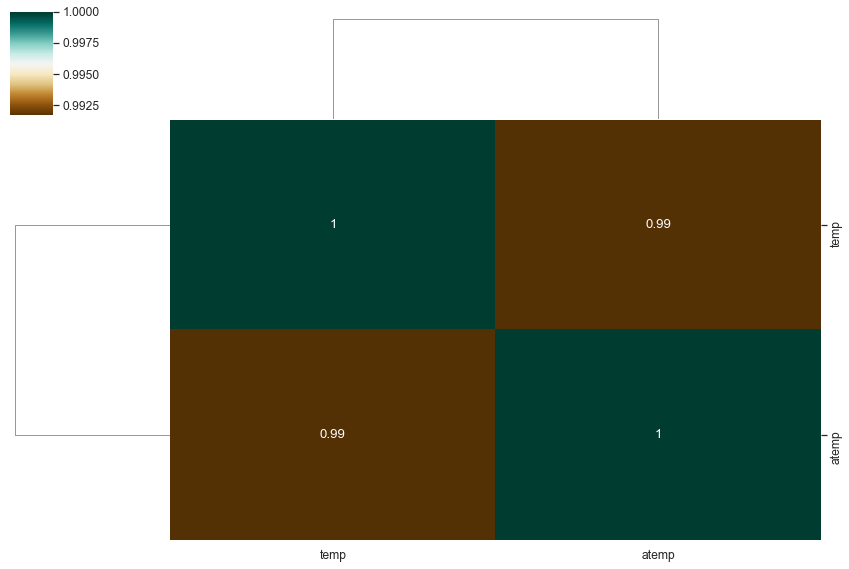

In [718]:
sns.set(font_scale=1.1)
sns.clustermap(dfTemp ,annot=True, figsize=(12, 8), cmap="BrBG")
plt.show()

- By seeing the above plot there is high correlation between temp and adjusted temp

In [719]:
BikeData.shape

(730, 12)

In [720]:
print(BikeData.temp.describe())
print("\n\n", "Value counts of temp: ")
print(BikeData.temp.value_counts())

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64


 Value counts of temp: 
10.899153    5
26.035000    5
23.130847    4
28.563347    4
27.880000    4
            ..
27.025847    1
19.270000    1
13.191299    1
24.155847    1
5.526103     1
Name: temp, Length: 498, dtype: int64


- Humidity Column

In [721]:
print(BikeData.hum.describe())
print("\n\n", "Value counts of hum: ")
print(BikeData.hum.value_counts())

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64


 Value counts of hum: 
61.3333    4
69.7083    3
59.0000    3
57.0000    3
72.9583    3
          ..
64.7917    1
44.9583    1
71.2083    1
50.0417    1
49.8750    1
Name: hum, Length: 594, dtype: int64


In [722]:
print(BikeData.windspeed.describe())
print("\n\n", "Value counts of windspeed: ")
print(BikeData.windspeed.value_counts())

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64


 Value counts of windspeed: 
7.416900     3
15.333486    3
7.959064     3
11.166689    3
7.125450     3
            ..
14.500475    1
8.250514     1
19.416332    1
16.522200    1
9.750175     1
Name: windspeed, Length: 649, dtype: int64


# Visualizing the data

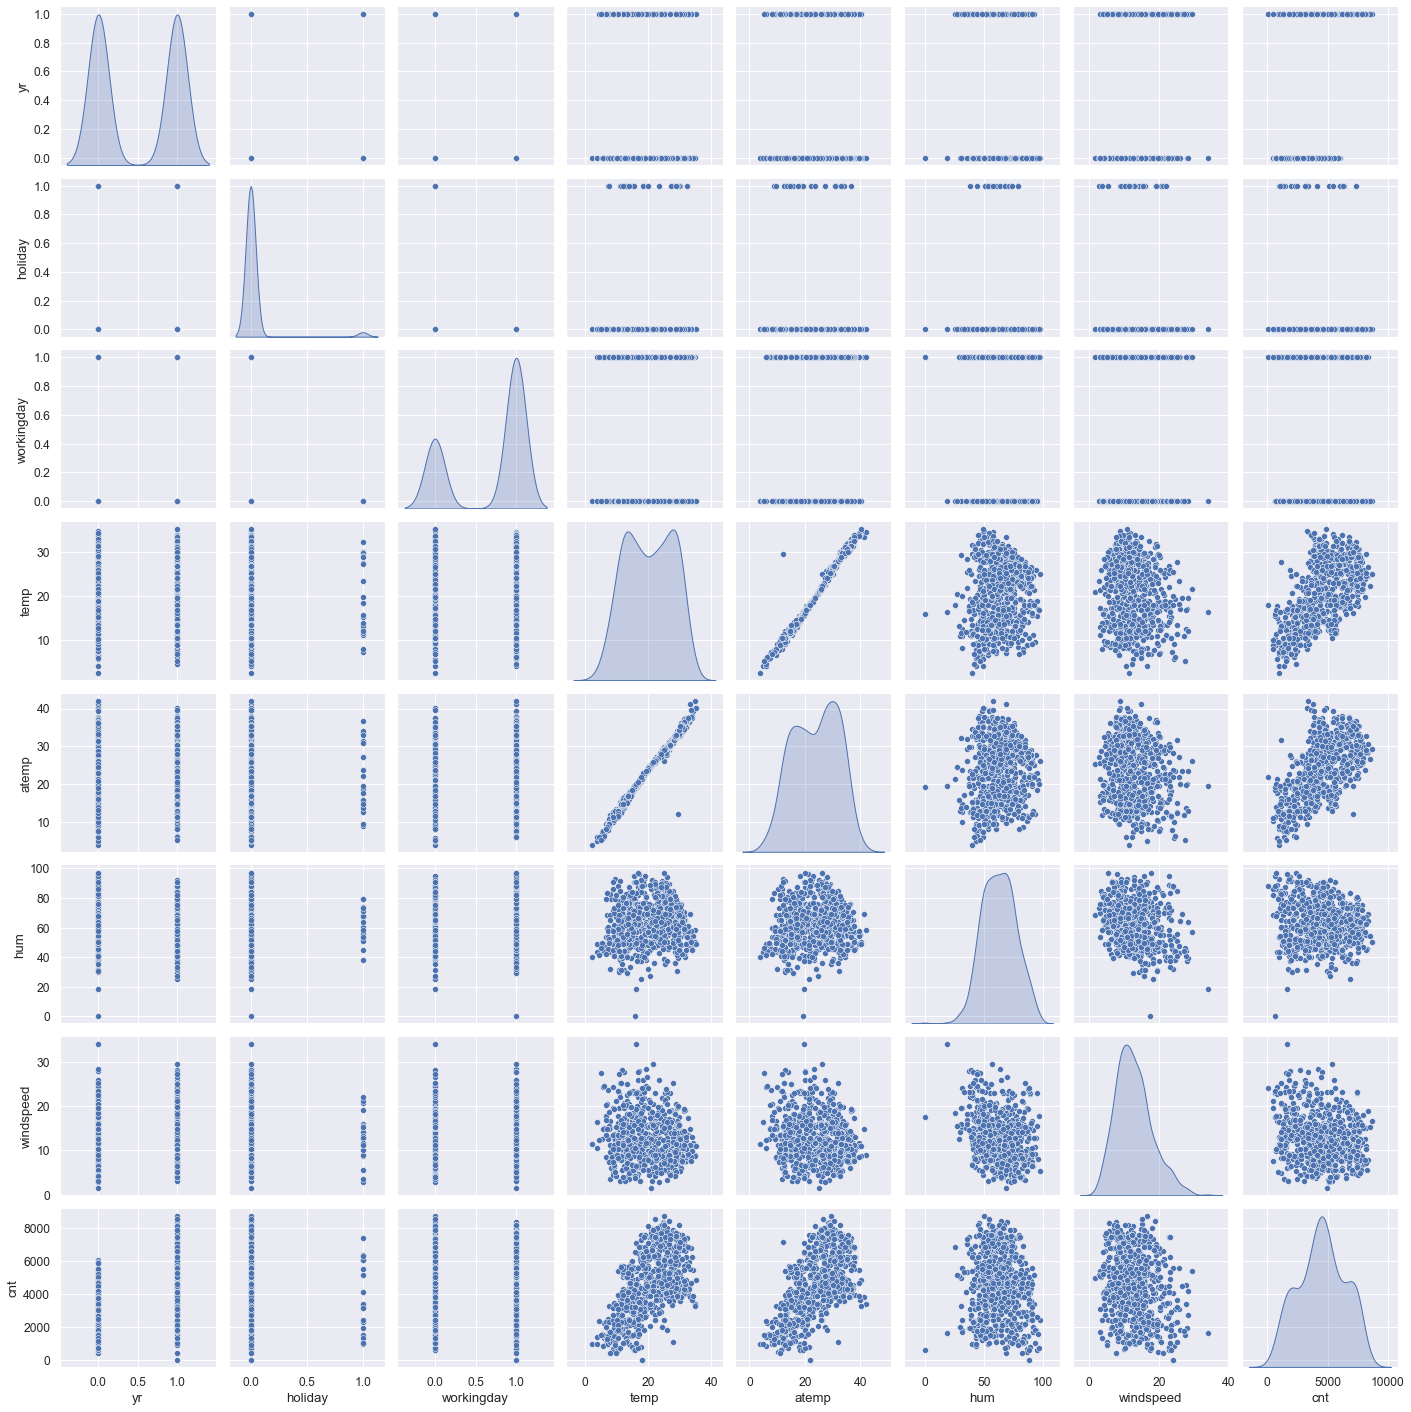

In [723]:
sns.pairplot(BikeData, diag_kind='kde')
plt.show()

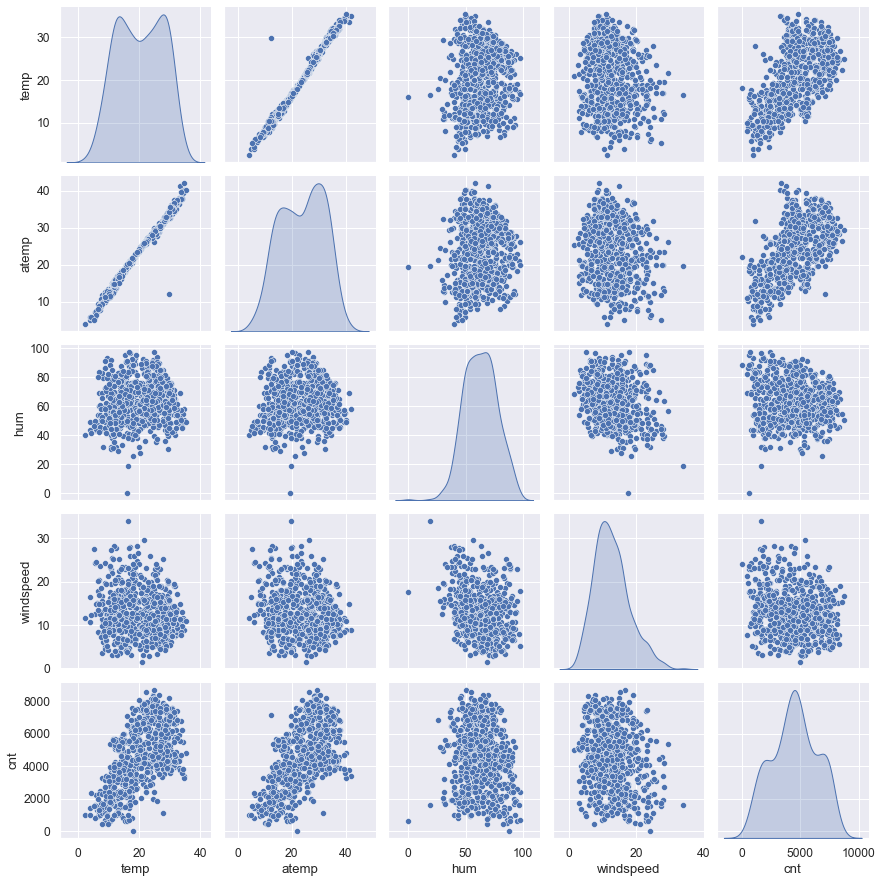

In [724]:
bike_num=BikeData[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

<h3> this plot tells us the temp, atemp and cnt variables has linear relation ship</h3>

#### Creating boxplots of catgorical varibales against the target varible count

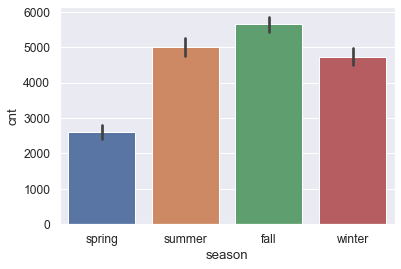

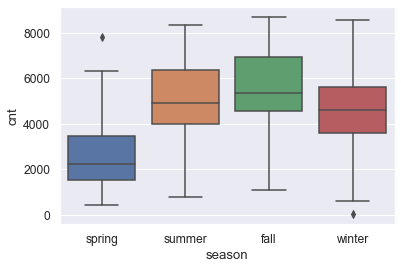

In [725]:
BikeData.head()
sns.barplot(x="season", y ="cnt", data = BikeData)
plt.show()
sns.boxplot(x="season", y ="cnt", data = BikeData)
plt.show()

- it seems that there are more bookinggs of bikes execept spring season  

- season: most of the bike booking were happening in season3 with a median of above 5000 booking. season summer and season winter with good number of bookings. This indicates, season can be a good predictor for the dependent variable.

 - Year and count variable bar plot,here
    - 0 : 2018 
    - 1 : 2019

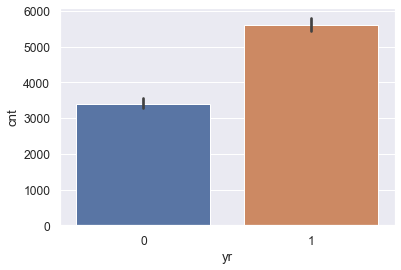

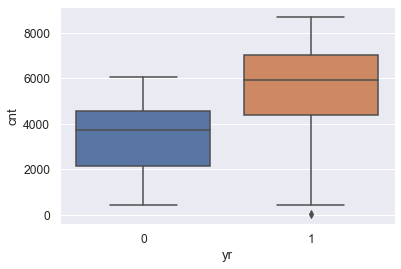

In [726]:
sns.barplot(x="yr", y ="cnt", data = BikeData)
plt.show()
sns.boxplot(x="yr", y ="cnt", data = BikeData)
plt.show()

- There are more bookling made year by year

- Month and count variable

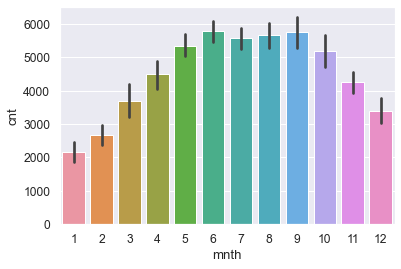

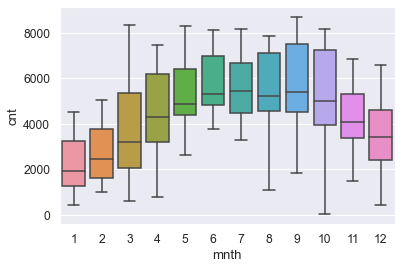

In [727]:
sns.barplot(x="mnth", y ="cnt", data = BikeData)
plt.show()
sns.boxplot(x="mnth", y ="cnt", data = BikeData)
plt.show()

-  most of the bike booking were happening in the months 5 to 9 months with a median above 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.


- weathersit and count varibales

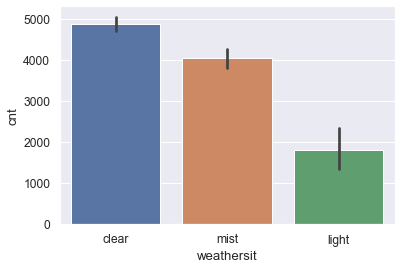

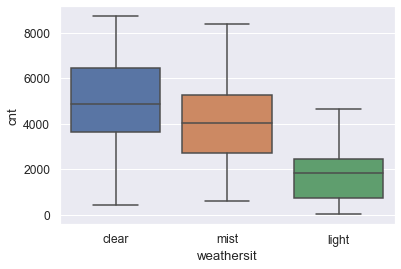

In [728]:
sns.barplot(x="weathersit", y ="cnt", data = BikeData)
plt.show()
sns.boxplot(x="weathersit", y ="cnt", data = BikeData)
plt.show()

- most of the bike booking were happening during weathersit = Clear with a median close to 5000 booking.
This was followed by other weathersit's. This indicates, weathersit also can be a good predictor for the dependent variable.


- There are more bookings when the whether is clear

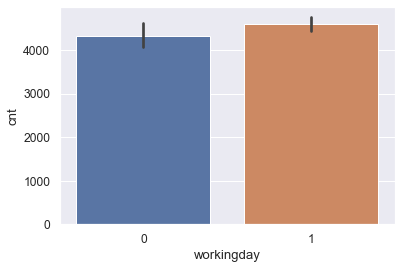

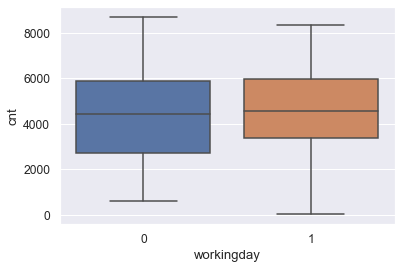

In [729]:
sns.barplot(x="workingday", y ="cnt", data = BikeData)
plt.show()
sns.boxplot(x="workingday", y ="cnt", data = BikeData)
plt.show()


- most of the bike booking were happening in ‘workingday’ with a median close to 5000.
- This indicates,  workingday can be a good predictor for the dependent variable

- Holiday and Count variables

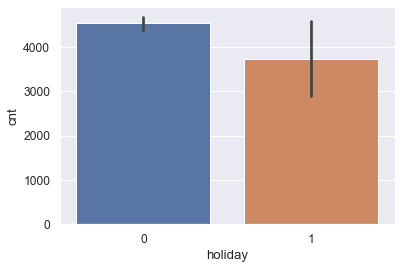

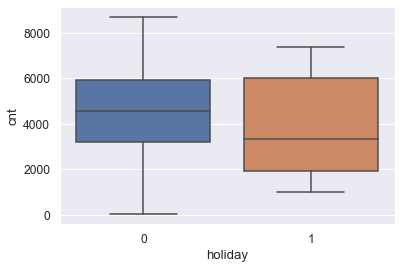

In [730]:
sns.barplot(x="holiday", y ="cnt", data = BikeData)
plt.show()
sns.boxplot(x="holiday", y ="cnt", data = BikeData)
plt.show()

- it seems more bookings nearly (97% ) are there in non holday
  This indicates, holiday <b> can not </b> be a good predictor for the dependent variable.


- Weekday Vs Cnt

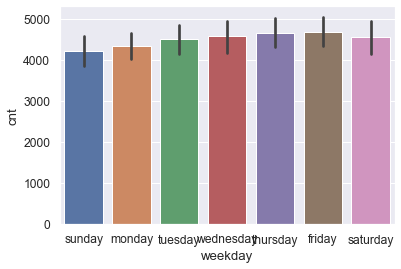

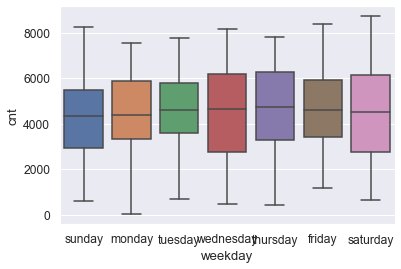

In [731]:
sns.barplot(x="weekday", y ="cnt", data = BikeData)
plt.show()
sns.boxplot(x="weekday", y ="cnt", data = BikeData)
plt.show()

- weekday variable shows very close meadian over all the days, having their median between  4000 and 5000<br>
This variable can have some  or no influence towards the predictor.let the model decide if this needs to be added or not.

# Create dummy variables for all the categorical features

- We will create DUMMY variables for the categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.

In [732]:
BikeNew.shape

(730, 12)

In [733]:
BikeNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [734]:
BikeDummy = pd.get_dummies(BikeNew, drop_first=True)
BikeDummy.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_11,mnth_12,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,weathersit_mist,weathersit_light
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


 - Checking the shape after creating the dummy variables

In [735]:
BikeDummy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yr                 730 non-null    int64  
 1   holiday            730 non-null    int64  
 2   workingday         730 non-null    int64  
 3   temp               730 non-null    float64
 4   atemp              730 non-null    float64
 5   hum                730 non-null    float64
 6   windspeed          730 non-null    float64
 7   cnt                730 non-null    int64  
 8   season_summer      730 non-null    uint8  
 9   season_fall        730 non-null    uint8  
 10  season_winter      730 non-null    uint8  
 11  mnth_2             730 non-null    uint8  
 12  mnth_3             730 non-null    uint8  
 13  mnth_4             730 non-null    uint8  
 14  mnth_5             730 non-null    uint8  
 15  mnth_6             730 non-null    uint8  
 16  mnth_7             730 non

In [736]:
BikeDummy.shape

(730, 30)

# split the data into two partts 
 - 1. Train data
 - 2. test data

In [737]:
bike_train, bike_test = train_test_split(BikeDummy, train_size=0.7,test_size = 0.3, random_state=100)

- checking shape and info of the train data set

In [738]:
bike_train.shape

(510, 30)

In [739]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yr                 510 non-null    int64  
 1   holiday            510 non-null    int64  
 2   workingday         510 non-null    int64  
 3   temp               510 non-null    float64
 4   atemp              510 non-null    float64
 5   hum                510 non-null    float64
 6   windspeed          510 non-null    float64
 7   cnt                510 non-null    int64  
 8   season_summer      510 non-null    uint8  
 9   season_fall        510 non-null    uint8  
 10  season_winter      510 non-null    uint8  
 11  mnth_2             510 non-null    uint8  
 12  mnth_3             510 non-null    uint8  
 13  mnth_4             510 non-null    uint8  
 14  mnth_5             510 non-null    uint8  
 15  mnth_6             510 non-null    uint8  
 16  mnth_7             510 no

- Checking test data shape and info

In [740]:
bike_test.shape

(219, 30)

In [741]:
bike_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yr                 219 non-null    int64  
 1   holiday            219 non-null    int64  
 2   workingday         219 non-null    int64  
 3   temp               219 non-null    float64
 4   atemp              219 non-null    float64
 5   hum                219 non-null    float64
 6   windspeed          219 non-null    float64
 7   cnt                219 non-null    int64  
 8   season_summer      219 non-null    uint8  
 9   season_fall        219 non-null    uint8  
 10  season_winter      219 non-null    uint8  
 11  mnth_2             219 non-null    uint8  
 12  mnth_3             219 non-null    uint8  
 13  mnth_4             219 non-null    uint8  
 14  mnth_5             219 non-null    uint8  
 15  mnth_6             219 non-null    uint8  
 16  mnth_7             219 no

In [742]:
BikeDummyCorr = BikeDummy.corr()

BikeDummyCorr

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_11,mnth_12,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,weathersit_mist,weathersit_light
yr,1.000000e+00,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728,-5.254075e-18,3.478017e-19,...,-7.198476e-18,1.091079e-17,0.003904,6.526760e-19,-0.003935,2.175587e-19,2.175587e-19,-0.003904,-0.005796,-0.073758
holiday,8.195345e-03,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,-2.440810e-02,-2.639258e-02,...,6.785194e-02,6.362682e-03,0.279764,-4.670117e-02,-0.046213,-2.325423e-02,-2.325423e-02,-0.070541,-0.018668,-0.029619
workingday,-2.945396e-03,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542,1.509123e-02,1.677487e-02,...,-1.087082e-02,-1.458882e-02,0.152976,2.688958e-01,0.267305,2.604690e-01,2.604690e-01,-0.602419,0.048877,0.028990
temp,4.878919e-02,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044,1.548756e-01,6.782830e-01,...,-2.066901e-01,-2.856645e-01,-0.004799,1.935952e-02,0.023459,1.949216e-02,-5.003258e-06,-0.030363,-0.096297,-0.058461
atemp,4.721519e-02,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685,1.631513e-01,6.557572e-01,...,-1.968773e-01,-2.774839e-01,0.000091,2.204543e-02,0.020842,2.045265e-02,-8.544145e-03,-0.031340,-0.092933,-0.064937
hum,-1.125471e-01,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543,-2.870035e-03,2.413415e-02,...,-5.837193e-03,8.220022e-02,0.028591,4.061570e-02,0.046059,-5.200348e-02,-3.980893e-02,-0.023310,0.490628,0.267592
windspeed,-1.162435e-02,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132,9.742067e-02,-1.398857e-01,...,-2.587339e-02,-5.461552e-02,0.000999,6.961095e-03,-0.014025,5.792278e-03,-2.163260e-02,0.032187,-0.037177,0.117332
cnt,5.697285e-01,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000,1.453245e-01,3.459080e-01,...,-4.034360e-02,-1.738782e-01,-0.035991,5.596898e-04,0.014012,3.355106e-02,3.840273e-02,0.009012,-0.170686,-0.240602
season_summer,-5.254075e-18,-0.024408,0.015091,0.154876,0.163151,-0.002870,0.097421,0.145325,1.000000e+00,-3.418943e-01,...,-1.737204e-01,-1.768562e-01,0.004803,-1.928926e-03,0.009410,-1.928926e-03,-1.928926e-03,-0.004187,0.040011,-0.043283
season_fall,3.478017e-19,-0.026393,0.016775,0.678283,0.655757,0.024134,-0.139886,0.345908,-3.418943e-01,1.000000e+00,...,-1.762453e-01,-1.794266e-01,-0.009294,1.939879e-03,0.004265,1.090261e-02,1.939879e-03,-0.000367,-0.101756,-0.026393


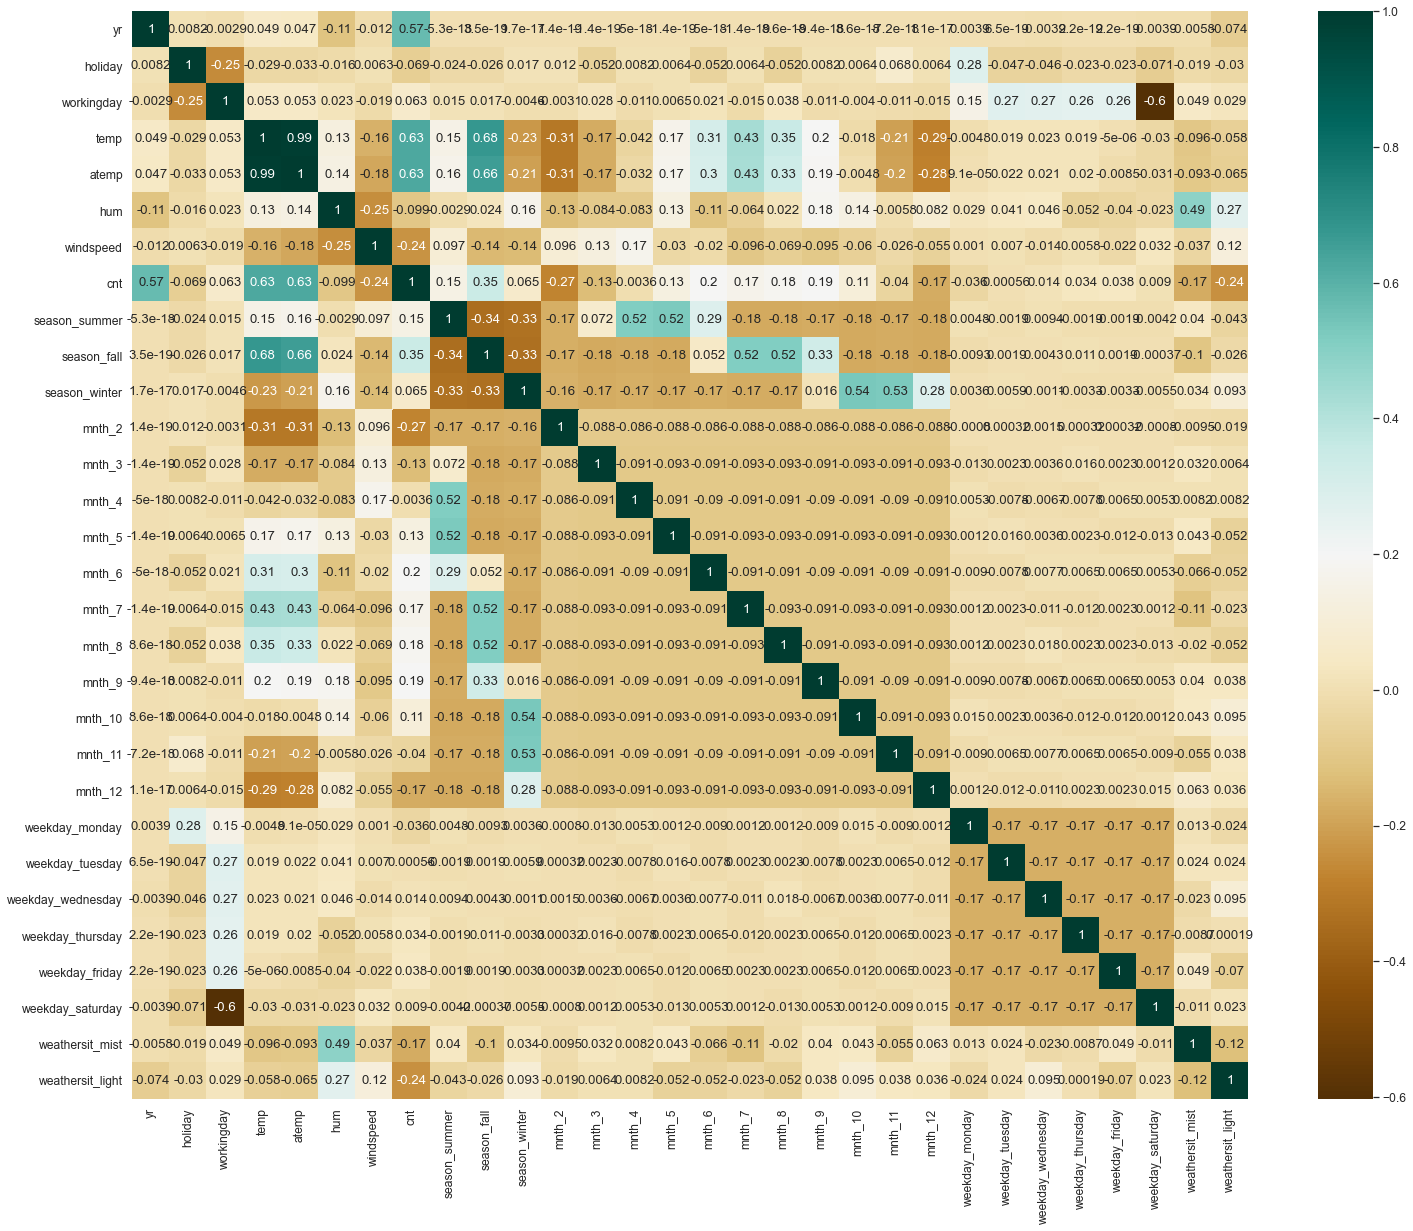

In [743]:
plt.figure(figsize = (25,20))
sns.heatmap(BikeDummyCorr, annot = True,  cmap="BrBG")
plt.show()


Thid heatmap shows which variable have high collinearity with the target variable.
We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

# scaling

In [744]:
scaler = MinMaxScaler()

In [745]:
# Checking the values before scaling
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_11,mnth_12,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,weathersit_mist,weathersit_light
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,1,1,0


In [746]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [747]:
# Checking values after scaling
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_11,mnth_12,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,weathersit_mist,weathersit_light
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0


In [748]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_11,mnth_12,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,weathersit_mist,weathersit_light
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Defining Target & Feature Variables for Iterative Modelling Process

 - Fixing Trained Target Variable


In [749]:
y_train = bike_train.pop('cnt')
X_train = bike_train

In [750]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [751]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', False, 2),
 ('mnth_4', False, 4),
 ('mnth_5', False, 3),
 ('mnth_6', False, 5),
 ('mnth_7', False, 8),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 9),
 ('mnth_12', False, 10),
 ('weekday_monday', False, 11),
 ('weekday_tuesday', False, 12),
 ('weekday_wednesday', False, 14),
 ('weekday_thursday', False, 15),
 ('weekday_friday', False, 13),
 ('weekday_saturday', True, 1),
 ('weathersit_mist', True, 1),
 ('weathersit_light', True, 1)]

RFE method has successfully evaluated top 15 predictors which will impact our outcome.
But, we will not rely on this enitirely and continue validating this 15 features manually by building model one by one and elimating any feature which does not satisfy our requirements

In [752]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_fall', 'season_winter', 'mnth_8', 'mnth_9',
       'mnth_10', 'weekday_saturday', 'weathersit_mist', 'weathersit_light'],
      dtype='object')

In [753]:
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_monday', 'weekday_tuesday',
       'weekday_wednesday', 'weekday_thursday', 'weekday_friday'],
      dtype='object')

In [754]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Model 1


In [755]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

def CalculateVIF(X_train_rfe):
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
  #  vif_df = vif_df.reset_index(drop=True)
    return vif


vif = CalculateVIF(X_train_rfe)
vif

,Features,VIF
3,temp,24.06
4,hum,17.47
7,season_fall,8.19
2,workingday,5.05
5,windspeed,3.88
6,season_summer,3.44
8,season_winter,2.88
13,weathersit_mist,2.15
0,yr,2.04
12,weekday_saturday,1.90


In [756]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [757]:
# Check the parameters 

lr1.params

const               0.195004
yr                  0.230066
holiday            -0.054625
workingday          0.044634
temp                0.495994
hum                -0.162256
windspeed          -0.182417
season_summer       0.117478
season_fall         0.029493
season_winter       0.143048
mnth_8              0.047452
mnth_9              0.117784
mnth_10             0.044229
weekday_saturday    0.053306
weathersit_mist    -0.059181
weathersit_light   -0.252340
dtype: float64

In [758]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.89e-191
Time:                        13:37:51   Log-Likelihood:                 520.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1950      0.029      6.791      0.000       0.139       0.251
yr                   0.2301      0.008     28.776      0.000       0.214       0.246
holiday             -0.0546      0.027     -2.033      0.043      -0.107      -0.002
workingday           0.0446      0.012      3.877      0.000       0.022       0.067
temp                 0.4960      0.034     14.803      0.000       0.430       0.562
hum                 -0.1623      0.037     -4.353      0.000      -0.235      -0.089
windspeed           -0.1824      0.025     -7.200      0.000      -0.232      -0.133
season_summer        0.1175      0.015      7.985      0.000       0.089       0.146
season_fall          0.0295      0.022      1.346      0.179      -0.014       0.073
season_winter        0.1430      0.013     10.688      0.000       0.117       0.169
mnth_8               0.0475      0.017      2.745      0.006       0.013       0.081
mnth_9               0.1178      0.017      6.895      0.000       0.084       0.151
mnth_10              0.0442      0.017      2.565      0.011       0.010       0.078
weekday_saturday     0.0533      0.015      3.676      0.000       0.025       0.082
weathersit_mist     -0.0592      0.010     -5.702      0.000      -0.080      -0.039
weathersit_light    -0.2523      0.026     -9.655      0.000      -0.304      -0.201
==============================================================================
Omnibus:                       77.307   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.274
Skew:                          -0.748   Prob(JB):                     5.94e-46
Kurtosis:                       5.751   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- #### Since Humidity has second High VIF value, I am gooing to drop that column from model and temp is an usful feature to prdedict the model

# Model 2

In [759]:
X_train_rfe = X_train_rfe.drop(["hum"], axis = 1)

VIF Check

In [760]:
vif = CalculateVIF(X_train_rfe)
vif

,Features,VIF
3,temp,16.80
6,season_fall,7.78
2,workingday,4.45
4,windspeed,3.72
5,season_summer,3.40
7,season_winter,2.78
0,yr,2.04
8,mnth_8,1.85
11,weekday_saturday,1.79
10,mnth_10,1.64


In [761]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()
lr2.params
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.7
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.40e-188
Time:                        13:37:51   Log-Likelihood:                 510.49
No. Observations:                 510   AIC:                            -991.0
Df Residuals:                     495   BIC:                            -927.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1012      0.019  

- #### Since season_fall has the high VIF , we have decided to drop the season_fall column from the model

# Model 3

In [762]:
X_train_rfe = X_train_rfe.drop(["season_fall"], axis = 1)

VIF Check

In [763]:
vif = CalculateVIF(X_train_rfe)
vif

,Features,VIF
3,temp,6.38
2,workingday,4.39
4,windspeed,3.60
0,yr,2.02
6,season_winter,2.02
5,season_summer,1.82
10,weekday_saturday,1.77
9,mnth_10,1.62
7,mnth_8,1.59
11,weathersit_mist,1.54


In [764]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()
lr3.params
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.9
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          6.16e-189
Time:                        13:37:52   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0945      0.019  

- #### Since we saw holiday column is insignificant co eff so we can drop that column

# Model 4

In [765]:
X_train_rfe = X_train_rfe.drop(["holiday"], axis = 1)

In [766]:
vif = CalculateVIF(X_train_rfe)
vif

,Features,VIF
2,temp,6.26
1,workingday,4.07
3,windspeed,3.49
0,yr,2.02
5,season_winter,1.99
4,season_summer,1.82
9,weekday_saturday,1.70
8,mnth_10,1.61
6,mnth_8,1.59
10,weathersit_mist,1.54


In [767]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()
lr4.params
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.2
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          2.86e-189
Time:                        13:37:52   Log-Likelihood:                 506.56
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     497   BIC:                            -932.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0856      0.019  

- #### Removing mnth_10 based on its high p value

# Model 5

In [768]:
 X_train_rfe = X_train_rfe.drop(["mnth_10"], axis = 1)

In [769]:
vif = CalculateVIF(X_train_rfe)
vif

,Features,VIF
2,temp,6.10
1,workingday,4.04
3,windspeed,3.49
0,yr,2.02
4,season_summer,1.81
8,weekday_saturday,1.69
6,mnth_8,1.58
9,weathersit_mist,1.54
5,season_winter,1.51
7,mnth_9,1.30


In [770]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()
lr5.params
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.8
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          2.00e-189
Time:                        13:37:52   Log-Likelihood:                 504.10
No. Observations:                 510   AIC:                            -984.2
Df Residuals:                     498   BIC:                            -933.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0813      0.019  

# Model 6

In [771]:
X_train_rfe = X_train_rfe.drop(["mnth_8"], axis = 1)


vif = CalculateVIF(X_train_rfe)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,weekday_saturday,1.69
4,season_summer,1.57
8,weathersit_mist,1.53
5,season_winter,1.40
6,mnth_9,1.20
9,weathersit_light,1.08


- #### From the VIF calculation we can find that there is no multicollinearity existing between the predictor variables, 
#### as all the values are within range of below 5

In [772]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()
lr6.params
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.47e-188
Time:                        13:37:53   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0753      0.019  

- #### This model looks good,  the p-values for all the predictors seems to be significant. For now, we will consider this as our final model untill test data metrics close to this number

# F Statistics
F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

F-statistic: 254.0
Prob (F-statistic): 1.47e-188
The F-Statistics = 254 (which > 1) and the p-value = '0.0000' states that the overall model is significant

# Assumption of Residual Analysis

#### There is a linear relationship between X and Y

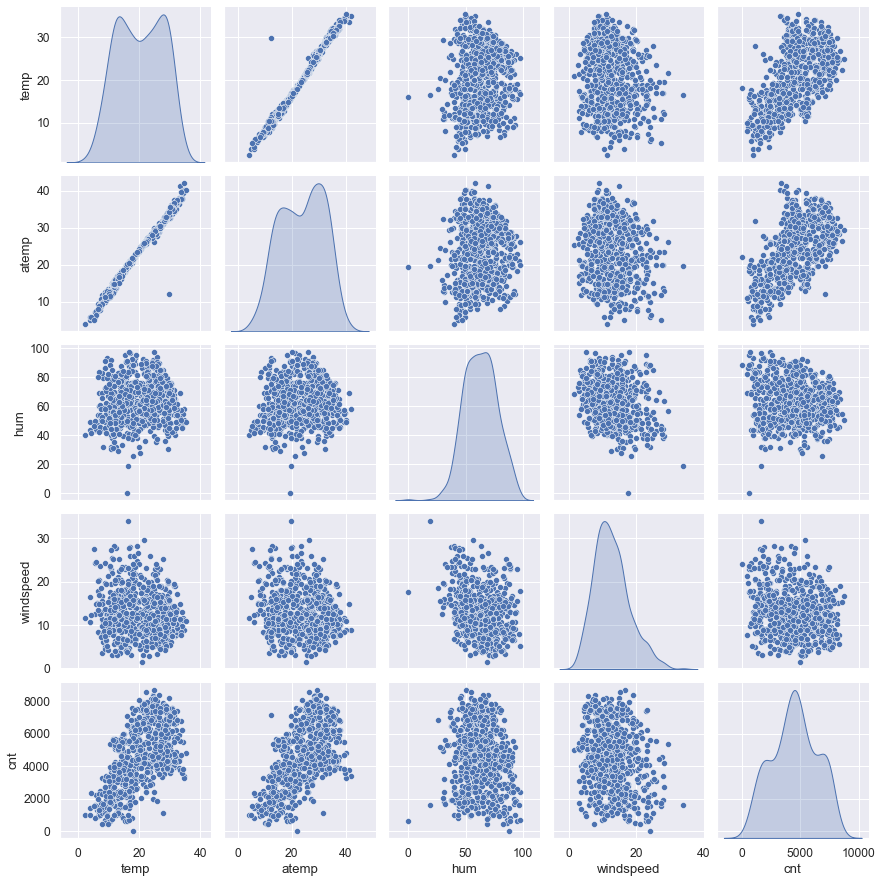

In [773]:
bike_num=BikeData[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

- #### By seeing the pair plot, there is a linear relation between temp and atemp variable with the predictor "Cnt".

#### Error values (ε) are normally distributed for any given value of  X


Text(0.5, 0, 'Errors')

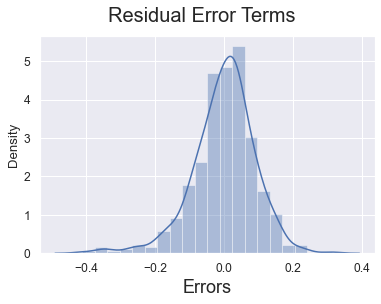

In [774]:
y_train_pred = lr6.predict(X_train_lm6)
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Residual Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

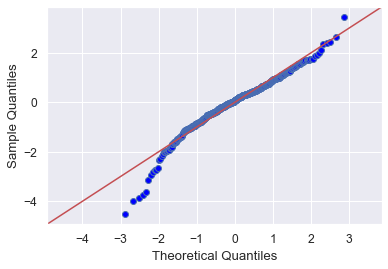

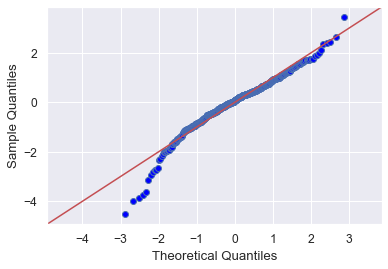

In [775]:
sm.qqplot(res, fit=True,line='45')

- #### From the above plot we could see that the residuals are normally distributed. so our assumption is valid.

# Homoscedasticity

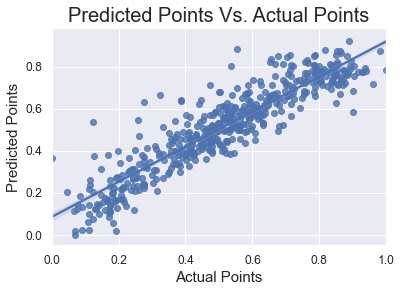

In [776]:
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

- #### In the plot we can see the equal variance of residuals across the prdicted values. this proves the Homoscedasticity

# Independence of Errors


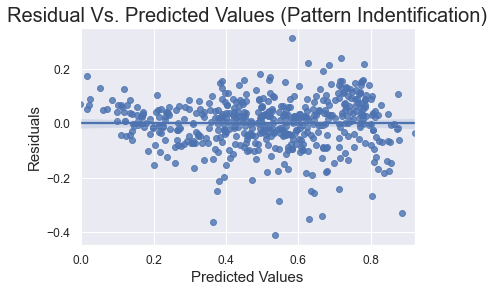

In [777]:
sns.regplot(x=y_train_pred, y=res)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

#####  we see that there is almost no relation between Residual & Predicted Value. 

# there is no multicollinearity in the data.

In [778]:
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,weekday_saturday,1.69
4,season_summer,1.57
8,weathersit_mist,1.53
5,season_winter,1.40
6,mnth_9,1.20
9,weathersit_light,1.08


#### Evaluating Correlation Co-efficients/VIF values of Predictors impacting Target Variable (Individually)
all the Predictors VIF values are below 5 so there is no multicollinearity in the data.

# test data analysis


In [779]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

bike_test[num_vars] = scaler.fit_transform(bike_test[num_vars])

In [780]:
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_11,mnth_12,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,weathersit_mist,weathersit_light
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0.569148,1,0,...,0,0,0,0,0,1,0,0,0,0


In [781]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_11,mnth_12,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,weathersit_mist,weathersit_light
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.546312,0.530942,0.508750,0.418870,0.516216,0.264840,0.246575,...,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.249189,0.228159,0.201253,0.188111,0.238702,0.442259,0.432005,...,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,0.359882,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,0.520241,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,0.682487,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h2> Divide into X_test and Y_test</h2>

In [782]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [783]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yr                 219 non-null    int64  
 1   holiday            219 non-null    int64  
 2   workingday         219 non-null    int64  
 3   temp               219 non-null    float64
 4   atemp              219 non-null    float64
 5   hum                219 non-null    float64
 6   windspeed          219 non-null    float64
 7   season_summer      219 non-null    uint8  
 8   season_fall        219 non-null    uint8  
 9   season_winter      219 non-null    uint8  
 10  mnth_2             219 non-null    uint8  
 11  mnth_3             219 non-null    uint8  
 12  mnth_4             219 non-null    uint8  
 13  mnth_5             219 non-null    uint8  
 14  mnth_6             219 non-null    uint8  
 15  mnth_7             219 non-null    uint8  
 16  mnth_8             219 no

In [784]:
#Selecting the variables that were part of final model.
col1=X_train_rfe.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   const             219 non-null    float64
 1   yr                219 non-null    int64  
 2   workingday        219 non-null    int64  
 3   temp              219 non-null    float64
 4   windspeed         219 non-null    float64
 5   season_summer     219 non-null    uint8  
 6   season_winter     219 non-null    uint8  
 7   mnth_9            219 non-null    uint8  
 8   weekday_saturday  219 non-null    uint8  
 9   weathersit_mist   219 non-null    uint8  
 10  weathersit_light  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [785]:
# Making predictions using the final model (lr6)

y_pred = lr6.predict(X_test_lm6)

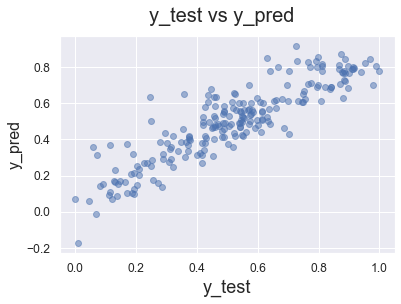

In [786]:
# Plot y_test and y_pred

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

# R^2 value for test data

In [787]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7880219317877523

# Adjusted R^2 value for test Data
 - formula  1-(1-r2)*(n-1)/(n-p-1)

In [788]:
# n is number of rows in X
R2 = 0.7880219317877523
n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(((1-R2)*(n-1))/(n-p-1))
adjusted_r2

0.7778306785083173

# Result of Test and Train Data

- Test Data
  - R^2 value :  0.7880219317877523
  - Adjusted R^2 values: 0.7778306785083173
- Train Data: 
    - R^2 value :  0.836
    - Adjusted R^2 values: 0.832
- This tells us it is a good model


<h3>According to the final Model, the top 3 predictor variables that influences the bike booking are:</h3>

- <b>Temperature (temp)</b> has a coefficient value of 0.5499 - indicated that a unit increase in temp variable increases the         bike hire numbers by 0.5499 units.
- <b>season Winter </b> has a coefficient value of  0.1318 indicated that, a unit increase in winter season variable increases        the bike hire numbers by  0.1318 units.
- <b>Year (yr)</b> has coefficient value of 0.2331 indicated that a unit increase in yr variable increases the bike hire numbers      by 0.2331 units.
<h3> and also I would suggest to consider the below varibles to achieve maximum bookings</h3>
- <b>Summer season </b>has a coefficient value of  0.0563 indicated that, a unit increase in summer season variable increases       the bike hire numbers by 0.0563 units.
- <b>WindSpeed </b>has coefficient value of -0.1552, so a unit increase the windspeed decreases the bike booking number by           '-0.1552' units.

-------------The End---------------------